In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Day 11 - MATH/PHYS 241

The transport of a conserved property by a fluid in motion is called *advection* or *convection*.

Although the terms are often used synonymously, if there is heat transfer occuring, then the process is described as convection. The resulting total transport of a substance is then by both diffusive and advective processes.

[Advection](https://en.wikipedia.org/wiki/Advection) describes the transport of a substance specifically due to the movement of the fluid the substance is in.

Disciplines such as ocean and atmospheric sciences think of advection as a transport mechanism associated with the mean flow (largely horizontal) and convection as a largely vertical transport associated with buoyancy contrasts.

Here we will use both terms to mean the passive transport of a substance by flow of the medium in which the substance is contained.

Geological situations in which advection or convection is important include the transport of dissolved species in groundwater and surface waters, heat in lava flows, and suspended sediment in rivers.

The fluid motion is represented by a vector, and the property or substance being transported is represented by a scalar quantity.

# 1-D Advection

Similar to the diffusion equation, the advection equation describes how a tracer quantity evolves in time. However, instead of gradients driving the transport (such as chemical and temperature from our previously worked examples), advection is driven by some physical velocity of the medium (wind or currents for example). We will not derive the advection equation, but you should note how similar the equation looks to diffusion:

$$
\begin{align}
\frac{\partial C}{\partial t} + u \frac{\partial C}{\partial x} &= 0 \tag{1}
\end{align}
$$

Where $C$ gives the concentration of the chemical being transported and $u$ is the x-velocity of the fluid carrying the chemical.

Note that there is no diffusion term and no source/sink terms in the equation. This means we should see a conservation of mass when transporting the chemical.

Because there is no 2nd order partial derivative in the advection equation, you might think it would be easy to find an accurate solution. However, we will see there is a complication we must consider when modeling advection, [numerical dispersion](https://en.wikipedia.org/wiki/Numerical_dispersion).

# Example Problem: Concentration of a Non-Dispersive Chemical

To set-up our problem, we can imagine a pollutant discharged into a river. the pollutant is carried passively or advected downstream by the flowing water in addition to spreading by diffusion.

Advection is typically many times faster than diffusion in most rivers, and if approximate answers suffice, then diffusion can be ignored.

Often, we would like to predict the time of arrival of the pollution front and the subsequent time history of its concentration, $C$, at various locations downstream, assuming variations of concentration within the cross section at a location are not important to us.

Let's look at 2 different pollution events:
* Chemical is added to the river at a constant rate over a set period of time, producing a "square" wave of high concentration.
* Chemical is added to the river at a non-constant rate over a set period of time, producing a "sine-squared" wave of high concentrion.

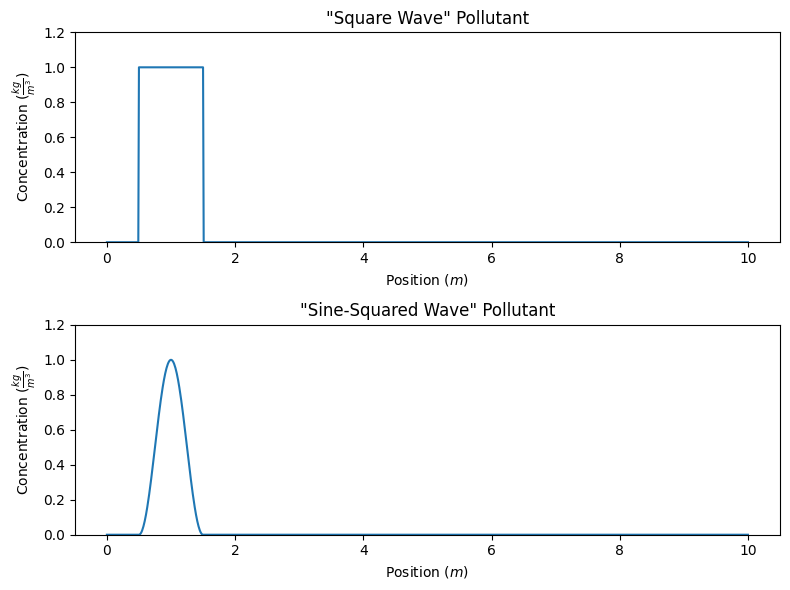

<Figure size 640x480 with 0 Axes>

In [67]:
# Define the width and maximum amplitude
width = 1
max_amplitude = 1

# Create the x-axis values
dx = 0.01
x = np.arange(0, 10+dx, dx)

# Square wave
square_wave = np.where((x >= 0.5) & (x <= 1.5), max_amplitude, 0)

# Sine-squared wave
sine_squared_wave = (np.sin(np.pi * (x - 0.5) / width) ** 2) * max_amplitude
sine_squared_wave = np.where((x >= 0.5) & (x <= 1.5), sine_squared_wave, 0)

# Create the subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

# Plot the square wave
ax1.plot(x, square_wave)
ax1.set_title('"Square Wave" Pollutant')
ax1.set_xlabel(r"Position ($m$)")
ax1.set_ylabel(r"Concentration ($\frac{kg}{m^3})$")
ax1.set_ylim([0,1.2])

# Plot the sine-squared wave
ax2.plot(x, sine_squared_wave)
ax2.set_title('"Sine-Squared Wave" Pollutant')
ax2.set_xlabel(r"Position ($m$)")
ax2.set_ylabel(r"Concentration ($\frac{kg}{m^3}$)")
ax2.set_ylim([0,1.2])


# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


# Discretization

To perform the numerical calculation, we need to discretize the domain (just as we did with diffusion):

* Divide space into points: $x_i = i\Delta x$
* Divide time into points: $t_n = n \Delta t$

Where $\Delta x$ gives the spatial step size and $\Delta t$ gives the temporal step size.



# FTCS Advection - How *NOT* to Model Advection

Our diffusion model used the *Forward Time Centered Space* scheme to calculate the diffusion process. It worked well enough in diffusion, it's worth trying to implement here. Afterall, the Centered Difference method seemed to do a good job calculating derivatives...

Applying the approach to equation 1 results in:

$$
\begin{align}
\frac{C_i^{n+1} - C_i^n}{\Delta t} + u \frac{C_{i+1}^n - C_{i-1}^n}{2 \Delta x} &= 0 \tag{2}
\end{align}
$$

We can rearrange the equation for $C_i^{n+1}$:

$$
\begin{align}
{C_i^{n+1}} &= C_i^n - \frac{u \Delta t}{2 \Delta x} \left( C_{i+1}^n - C_{i-1}^n \right)  \tag{3}
\end{align}
$$

You might have noticed the term $\frac{u \Delta t}{\Delta x}$ looks similar to our stability criterion from diffusion. It is also important in advection and has a special name: the [CFL Condition](https://en.wikipedia.org/wiki/Courant%E2%80%93Friedrichs%E2%80%93Lewy_condition).

# CFL Condition

The Courant-Friedrichs-Lewy Condition (sometimes abbreviated CFL Condition, or often just lower case c) is a condition required for stability when numerically solving partial differential equations.

$$
\begin{align}
c = u \frac{\Delta t}{\Delta x} \tag{4}
\end{align}
$$

If we have a discrete spatial grid with a wave amplitude moving through it, then we will need to ensure our time steps are small enough to capture the wave movement accurately.

The exact value of the condition depends on the scheme we are using. Most valid schemes require $c \leq 1$.

Alright, let's see how the FTCS scheme performs. The function `ftcs(C,c)`will calculate the 1-D advection of a chemical following equations 3 and 4.  

In [68]:
# FTCS scheme

# C = discretized concentration, c = CFL condition
def ftcs(C, c):

    # copy input concentrations
    Cn = C.copy()

    # peform advection
    for n in range(nt):
        C[1:-1] = Cn[1:-1] - 0.5 * c * (Cn[2:] - Cn[:-2])
        Cn[:] = C[:]

    return C

## Class Problem 1

Use the `ftcs` function to advect our two chemical pollutants over 1 second. Add the advected chemical distributions to the plot to see how well the shape and size of each wave is preserved.

Use the following values:
* $u = 1 \ \frac{\text{m}}{\text{s}}$
* $\Delta t = 0.01 \ \text{s}$
* $\Delta x = 0.01 \ \text{m}$

Does changing the value of $c$ change the result?

The result is 100% garbage in either case. Changing the value of $c$ does not help to improve the result either. Clearly, this method is not the correct approach to numerical advection. Let's look at an approach that can work.

# Upwind Advection

One of the simplest methods to model advection that works pretty well is called [Upwind Advection](https://en.wikipedia.org/wiki/Upwind_scheme). This particular method requires that we have the fluid flow from "behind" us, where we time step forward in the spatial direction *with* the velocity of the fluid. The equation looks like:

$$
\begin{align}
C^{n+1}_i &= C^n_i + u\frac{\Delta t}{\Delta x} \left(C^n_{i} - C^n_{i-1} \right) \tag{5}
\end{align}
$$

In python, we can write a function like the one below to execute the calculation for us.

In [69]:
# Upwind scheme
def upwind(C, c):
    Cn = C.copy()
    for n in range(nt):
        C[1:] = Cn[1:] - c * (Cn[1:] - Cn[:-1])
        Cn[:] = C[:]
    return C

## Class Problem 2

Use the Upwind Advection scheme `upwind` to advect our two chemical pollutants over **2** second and **7** seconds . Add the advected chemical distributions to the plot to see how well the shape and size of each wave is preserved.

Use the following values:
* $u = 1 \ \frac{\text{m}}{\text{s}}$
* $\Delta t = 0.01 \ \text{s}$
* $\Delta x = 0.01 \ \text{m}$

If we change the value of $c$ so that it is less than 1, how do the plots change? For what value of $c$ does the advection perform best? Can you think of a way to evaluate the conservation of mass as the wave advects?

# Lax-Wendroff Scheme

The final method for advection we will look at today is known as the [Lax-Wendroff Scheme](https://en.wikipedia.org/wiki/Lax%E2%80%93Wendroff_method) (or method). The exact derivation is not critical for us to know, but it can offer advantages over the Upwind method. For example, the Lax-Wendroff scheme is very good at preserving the wave shape and guards against numerical dispersion and diffusion, something that can happen with the Upwind Scheme.

The equation is very similar to the FTCS Scheme, but adds a 2nd order term via Taylor Expansion to reduce error and add stability:

$$
\begin{align}
{C_i^{n+1}} &= C_i^n - \frac{1}{2} \frac{u \Delta t}{\Delta x} \left( C_{i+1}^n - C_{i-1}^n \right) + \frac{1}{2} \left(\frac{u \Delta t}{\Delta x} \right)^2 \left( C_{i+1}^n -2C^n_i + C_{i-1}^n \right) \tag{6}
\end{align}
$$

The CFL Condition for Lax-Wendroff is $c \leq 1$.

In python, the function will look like the following:

In [70]:
# Lax-Wendroff scheme
def lax_wendroff(C, c):
    Cn = C.copy()
    for n in range(nt):
        C[1:-1] = (Cn[1:-1]
                   - 0.5 * c * (Cn[2:] - Cn[:-2])
                   + 0.5 * c**2 * (Cn[2:] - 2*Cn[1:-1] + Cn[:-2]))
        Cn[:] = C[:]
    return C

## Class Problem 3

Use the Upwind Advection scheme `lax_wendroff` to advect our two chemical pollutants over **2** second and **7** seconds . Add the advected chemical distributions to the plot to see how well the shape and size of each wave is preserved.

Use the following values:
* $u = 1 \ \frac{\text{m}}{\text{s}}$
* $\Delta t = 0.01 \ \text{s}$
* $\Delta x = 0.01 \ \text{m}$

If we change the value of $c$ so that it is less than 1, how do the plots change? For what value of $c$ does the advection perform best? Can you think of a way to evaluate the conservation of mass as the wave advects?